In [1]:
import qiskit
from qiskit.backends import BaseBackend
from qiskit.backends.ibmq import IBMQBackend

In [2]:
import numpy as np

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

X, y = load_wine(True)

In [3]:
preprocessing_pipeline = Pipeline([
    ('scaler',  StandardScaler()),
    ('l2norm', Normalizer(norm='l2', copy=True))
])
X = preprocessing_pipeline.fit_transform(X, y)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [5]:
from qiskit_qml.feature_maps import NormedAmplitudeEncoding
from qiskit_qml.distance_based.hadamard import QmlHadamardNeighborClassifier
from qiskit_qml.distance_based.hadamard.state import QmlGenericStateCircuitBuilder
from qiskit_qml.distance_based.hadamard.state.sparsevector import MöttönenStatePreparation

initial_state_builder = QmlGenericStateCircuitBuilder(MöttönenStatePreparation())

execution_backend: BaseBackend = qiskit.Aer.get_backend('qasm_simulator')
qml = QmlHadamardNeighborClassifier(backend=execution_backend,
                                    shots=8192, 
                                    classifier_state_factory=initial_state_builder,
                                    feature_map=NormedAmplitudeEncoding())

In [6]:
qml.fit(X_train, y_train)

In [7]:
prediction = qml.predict(X_test)

In [8]:
prediction

[0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1]

## Accuracy

In [10]:
"Test Accuracy: {}".format(
    sum([1 if p == t else 0 for p, t in zip(prediction, y_test)])/len(prediction)
)

'Test Accuracy: 0.9444444444444444'

In [ ]:
prediction_train = qml.predict(X_train)

In [ ]:
"Train Accuracy: {}".format(
    sum([1 if p == t else 0 for p, t in zip(prediction_train, y_train)])/len(prediction_train)
)

## Other

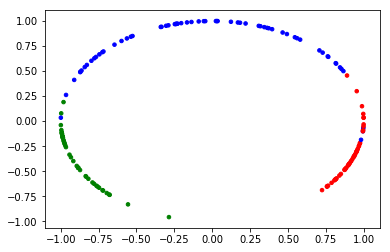

In [16]:
plt.scatter(
    X_train[:,0], X_train[:,1], 
    color=[colors[yy] for yy in y_train],
    marker='.', s=50)
plt.show()

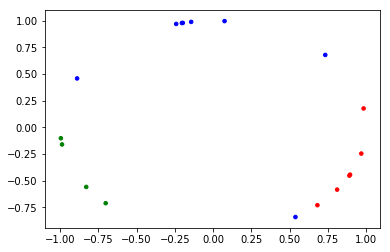

In [17]:
plt.scatter(
    X_test[:,0], X_test[:,1], 
    color=[colors[yy] for yy in prediction],
    marker='.', s=50)
plt.show()

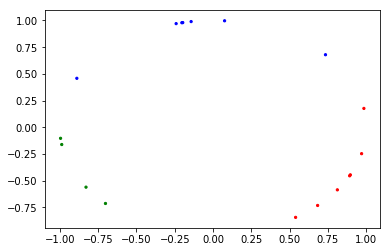

In [18]:
plt.scatter(
    X_test[:,0], X_test[:,1], 
    color=[colors[yy] for yy in y_test],
    marker='.', s=20)
plt.show()

## Comparison to theoretical results

In [21]:
for i in range(len(X_test)):
    print("{:.4f} ~~ {:.4f}".format(qml.last_predict_p_acc[i], 
                                    QmlHadamardNeighborClassifier.p_acc_theory(X_train, y_train, X_test[i])))

0.5142 ~~ 0.4985
35.6477 ~~ 0.4747
5.6364 ~~ 0.4756
5.5989 ~~ 0.4989
5.6056 ~~ 0.5443
5.4849 ~~ 0.4824
5.6046 ~~ 0.5368
5.6556 ~~ 0.4594
5.5583 ~~ 0.5439
5.4779 ~~ 0.4733
5.6281 ~~ 0.5274
5.5062 ~~ 0.4554
5.4554 ~~ 0.5089
5.4979 ~~ 0.5018
5.4093 ~~ 0.4912
5.6912 ~~ 0.5396
0.5051 ~~ 0.5381
0.4935 ~~ 0.5379


In [22]:
for i in range(len(X_test)):
    print("{:.4f} ~~ {:.4f}".format(qml.last_predict_probability[i], 
                                   QmlHadamardNeighborClassifier.p_label_theory(X_train, y_train, X_test[i], prediction[i])))

0.6327 ~~ 0.6386
0.4092 ~~ 0.1494
0.4628 ~~ 0.5523
0.4090 ~~ 0.6383
0.4281 ~~ 0.6399
0.3779 ~~ 0.6277
0.4391 ~~ 0.6452
0.4787 ~~ 0.5796
0.4668 ~~ 0.5455
0.3877 ~~ 0.5594
0.4277 ~~ 0.5641
0.4173 ~~ 0.5684
0.4050 ~~ 0.6257
0.4007 ~~ 0.5463
0.4037 ~~ 0.6387
0.4497 ~~ 0.6460
0.6266 ~~ 0.6458
0.6310 ~~ 0.6457


In [22]:
print(qml._last_predict_circuits[0].qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg ancilla[1];
qreg index[8];
qreg data[1];
qreg qlabel[2];
creg clabel[2];
creg branch[1];
ry(1.10403098774760) qlabel[1];
cx qlabel[1],qlabel[0];
ry(0.837215003154816) qlabel[0];
cx qlabel[1],qlabel[0];
ry(0.837215003154816) qlabel[0];
cx qlabel[1],data[0];
ry(0.342460271355601) data[0];
cx qlabel[0],data[0];
ry(-0.363924057253649) data[0];
cx qlabel[1],data[0];
ry(0.109655220045199) data[0];
cx qlabel[0],data[0];
ry(0.816039548654449) data[0];
cx qlabel[1],index[7];
ry(0.233330279319581) index[7];
cx data[0],index[7];
ry(0.0351799489054834) index[7];
cx qlabel[0],index[7];
ry(0.0291085686426272) index[7];
cx data[0],index[7];
ry(-0.233230209229748) index[7];
cx qlabel[1],index[7];
ry(0.232536866539876) index[7];
cx data[0],index[7];
ry(-0.0159531258324694) index[7];
cx qlabel[0],index[7];
ry(-0.00988174556961312) index[7];
cx data[0],index[7];
ry(0.699097355089206) index[7];
cx qlabel[1],index[6];
ry(0.191614575052919) index[6];
cx index[7],inde